In [94]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import os

In [95]:
mnist=tf.keras.datasets.mnist
(X_train_full,y_train_full),(X_test,y_test)=mnist.load_data()

In [96]:
print(X_train_full.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [97]:
X_train_full[59999]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [98]:
#create validation from full training dataset
#scale the data between 1-0 by dividing data by 255
X_valid,X_train=X_train_full[:5000]/255,X_train_full[:5000]/255
y_valid,y_train=y_train_full[:5000],y_train_full[:5000]
X_test=X_test/255

In [99]:
LAYERS=[tf.keras.layers.Flatten(input_shape=[28,28],name='inputLayer')
       ,tf.keras.layers.Dense(300,activation='relu',name='HiddenLayer1')
        ,tf.keras.layers.Dense(300,activation='relu',name='HiddenLayer12')
        ,tf.keras.layers.Dense(300,activation='relu',name='HiddenLayer13')
        ,tf.keras.layers.Dense(300,activation='relu',name='HiddenLayer14')
        ,tf.keras.layers.Dense(300,activation='relu',name='HiddenLayer15')
        ,tf.keras.layers.Dense(10,activation='softmax',name='OutputLayer')
       ]
model_clf=tf.keras.models.Sequential(LAYERS)

In [100]:
model_clf.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputLayer (Flatten)         (None, 784)               0         
_________________________________________________________________
HiddenLayer1 (Dense)         (None, 300)               235500    
_________________________________________________________________
HiddenLayer12 (Dense)        (None, 300)               90300     
_________________________________________________________________
HiddenLayer13 (Dense)        (None, 300)               90300     
_________________________________________________________________
HiddenLayer14 (Dense)        (None, 300)               90300     
_________________________________________________________________
HiddenLayer15 (Dense)        (None, 300)               90300     
_________________________________________________________________
OutputLayer (Dense)          (None, 10)               

In [101]:
weight1=model_clf.layers[1]

In [102]:
weight1.get_weights()

[array([[ 0.02255782,  0.0432272 , -0.05359783, ...,  0.04975715,
          0.01450276, -0.0010449 ],
        [ 0.03194702,  0.03532905,  0.04906221, ..., -0.00732724,
          0.06978905,  0.05658393],
        [ 0.04966351,  0.03818464,  0.05245289, ...,  0.05722944,
         -0.05221161, -0.0304397 ],
        ...,
        [-0.02284696, -0.06651   ,  0.04281913, ..., -0.02556128,
         -0.02111065,  0.02434439],
        [ 0.00494391,  0.02707141,  0.01622189, ...,  0.0040813 ,
         -0.02550042, -0.03226038],
        [ 0.04357383,  0.00346078, -0.03970285, ...,  0.05164349,
         -0.03132434,  0.06683032]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [103]:
LOSS_FUNCTION='sparse_categorical_crossentropy'
optimizer='SGD'
metrics=['accuracy']
model_clf.compile(loss=LOSS_FUNCTION,optimizer=optimizer,metrics=metrics)

In [104]:
EPOCH=50
VALIDATION_SET=(X_valid,y_valid)
history=model_clf.fit(X_train,y_train,epochs=EPOCH,validation_data=VALIDATION_SET)

Epoch 1/50
157/157 [==============================] - 2s 12ms/step - loss: 2.2201 - accuracy: 0.3500 - val_loss: 2.0677 - val_accuracy: 0.5492
Epoch 2/50
157/157 [==============================] - 2s 10ms/step - loss: 1.6115 - accuracy: 0.6546 - val_loss: 1.0639 - val_accuracy: 0.7222
Epoch 3/50
157/157 [==============================] - 2s 10ms/step - loss: 0.7786 - accuracy: 0.7944 - val_loss: 0.5928 - val_accuracy: 0.8350
Epoch 4/50
157/157 [==============================] - 2s 11ms/step - loss: 0.5263 - accuracy: 0.8554 - val_loss: 0.4462 - val_accuracy: 0.8786
Epoch 5/50
157/157 [==============================] - 2s 10ms/step - loss: 0.4138 - accuracy: 0.8850 - val_loss: 0.3957 - val_accuracy: 0.8838
Epoch 6/50
157/157 [==============================] - 2s 14ms/step - loss: 0.3517 - accuracy: 0.8988 - val_loss: 0.3139 - val_accuracy: 0.9154
Epoch 7/50
157/157 [==============================] - 1s 9ms/step - loss: 0.3120 - accuracy: 0.9100 - val_loss: 0.3510 - val_accuracy: 0.8946


In [105]:
def modelSave(model_dir="Saved Models"):
    os.makedirs(model_dir,exist_ok=True)
    file_name=time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")
    model_path=os.path.join(model_dir,file_name)
    print(f"your model will be stored at following location {model_path}")
    return model_path
UNIQUE_PATH=model_clf.save(modelSave())
    

your model will be stored at following location Saved Models\Model_2021_01_07_21_39_21_.h5


In [106]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,2.220104,0.3500,2.067664,0.5492
1,1.611483,0.6546,1.063859,0.7222
2,0.778563,0.7944,0.592779,0.8350
3,0.526339,0.8554,0.446154,0.8786
4,0.413805,0.8850,0.395729,0.8838
5,0.351730,0.8988,0.313935,0.9154
6,0.311961,0.9100,0.351009,0.8946
7,0.279248,0.9208,0.244253,0.9326
8,0.245691,0.9304,0.253246,0.9248
9,0.224674,0.9374,0.226802,0.9320


In [107]:
model_clf.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2774 - accuracy: 0.9348


[0.2774028778076172, 0.9348000288009644]

In [108]:
X_new=X_test[:2]
y_prob=model_clf.predict(X_new)
y_prob.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 0.99, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [109]:
y_pred=np.argmax(model_clf.predict(X_new),axis=-1)
y_pred

array([7, 2], dtype=int64)

In [110]:
y_test_new=y_test[:2]

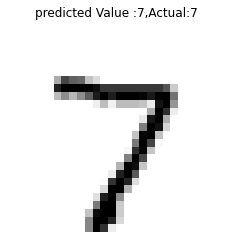

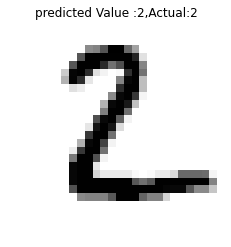

In [111]:
for data,pred,actual in zip(X_new,y_pred,y_test_new):
    plt.imshow(data,cmap="binary")
    plt.title(f"predicted Value :{pred},Actual:{actual}")
    plt.axis('off')
    plt.show()

In [112]:
## Testing my images

In [114]:
pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org opencv-python

Note: you may need to restart the kernel to use updated packages.



You should consider upgrading via the 'c:\users\virat.singh\anaconda3\envs\tf2\python.exe -m pip install --upgrade pip' command.


In [116]:
import matplotlib.image as mpimg

In [124]:
import cv2
img=mpimg.imread('six.jpg')
im=cv2.resize(img,(28,28))
im.shape

(28, 28, 3)

In [127]:
def rgb2grey(rgb):
    return np.dot(rgb[...,:3],[0.2989,0.5870,1140])

In [128]:
grey=rgb2grey(im)
grey=grey.reshape(1,28,28)

In [129]:
y_pred=np.argmax(model_clf.predict(grey),axis=-1)

In [130]:
y_pred

array([3], dtype=int64)